# Problem 1：Data exploration

You should do some exploratory data analysis and show
your understanding of this dataset. You can start from basic
statistical information, such as num Imps, num Clicks, Cost,
CTR, avg CPM, eCPC. You can also include further analysis
on user feedback, bidding etc. A good example can be found
in the paper.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import math
import collections

train file

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1,...,250,FourthView,Na,0,10722,294,23,null,2821,null
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2,...,90,OtherView,Na,133,7330,277,133,null,2259,null


In [4]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object')

In [5]:
#function for number counter
from collections import Counter

In [5]:
advertiser = train.advertiser
Counter(advertiser)

Counter({1458: 492353,
         2259: 133673,
         2261: 110122,
         2821: 211366,
         2997: 49829,
         3358: 264956,
         3386: 455041,
         3427: 402806,
         3476: 310835})

In [6]:
bidprice = train.bidprice
Counter(bidprice)

Counter({227: 235767,
         238: 313445,
         241: 204893,
         249: 105647,
         254: 118845,
         277: 182981,
         294: 322009,
         300: 947394})

In [7]:
payprice = train.payprice
Counter(payprice)

Counter({0: 487,
         1: 2322,
         2: 3419,
         3: 759,
         4: 10395,
         5: 45131,
         6: 14559,
         7: 12169,
         8: 9943,
         9: 10492,
         10: 21235,
         11: 16934,
         12: 13901,
         13: 12402,
         14: 12493,
         15: 12186,
         16: 17635,
         17: 19275,
         18: 17904,
         19: 12385,
         20: 108131,
         21: 30269,
         22: 36707,
         23: 11585,
         24: 13791,
         25: 13201,
         26: 7863,
         27: 11319,
         28: 9733,
         29: 8508,
         30: 26681,
         31: 43491,
         32: 13256,
         33: 17379,
         34: 13816,
         35: 5934,
         36: 14136,
         37: 9697,
         38: 12936,
         39: 7290,
         40: 19969,
         41: 11222,
         42: 15984,
         43: 8803,
         44: 14403,
         45: 13926,
         46: 9310,
         47: 14358,
         48: 8231,
         49: 15815,
         50: 109782,
    

In [8]:
Adv_group=train.groupby(train['advertiser'])
Clicks = Adv_group['click'].sum()
#Clicks
Imps = Adv_group['click'].count()
#Imps
Cost =  Adv_group['payprice'].sum()/1000
#Cost: the unit is fen/one impression, bidprice or payprice is fen oer 1000 impressions
CTR = Clicks/Imps
#CTR
CPM = Cost/Imps
CPM = CPM*1000
#CPM: cost per mille people, so *1000
eCPC = Cost/Clicks
#eCPC
Train_summ = pd.DataFrame({'Imps':Imps, 'Clicks':Clicks, 'Cost':Cost, 'CTR':CTR, 'CPM':CPM, 'eCPC':eCPC})
Train_summ


,CPM,CTR,Clicks,Cost,Imps,eCPC
advertiser,,,,,,
1458,68.992646,0.000782,385,33968.736,492353,88.230483
2259,92.974931,0.000322,43,12428.238,133673,289.028791
2261,89.662184,0.000327,36,9873.779,110122,274.271639
2821,89.077922,0.000620,131,18828.044,211366,143.725527
2997,62.800116,0.004355,217,3129.267,49829,14.420585
3358,84.720599,0.000762,202,22447.231,264956,111.124906
3386,76.766320,0.000703,320,34931.823,455041,109.161947
3427,75.616329,0.000675,272,30458.711,402806,111.980555
3476,76.950083,0.000602,187,23918.779,310835,127.907909


In [ ]:
train["bid"]

In [14]:
#correlation
def correlationFeatures(dataset):
    print(list(dataset))

    dataset=dataset.filter(items=['click', 'weekday', 'hour', 'userid', 'IP', 'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid', 'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice', 'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'os', 'browser'])
    corr=dataset.corr()
    print(corr)


['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP', 'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid', 'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice', 'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag']
               click   weekday      hour    region      city  slotwidth  \
click       1.000000 -0.000444  0.004346 -0.000521 -0.000600  -0.001840   
weekday    -0.000444  1.000000 -0.106134  0.011518  0.011798   0.028315   
hour        0.004346 -0.106134  1.000000 -0.046727 -0.045485   0.014604   
region     -0.000521  0.011518 -0.046727  1.000000  0.994909  -0.035879   
city       -0.000600  0.011798 -0.045485  0.994909  1.000000  -0.035594   
slotwidth  -0.001840  0.028315  0.014604 -0.035879 -0.035594   1.000000   
slotheight -0.002772 -0.022569 -0.017277  0.015709  0.016424  -0.753861   
slotprice   0.003160  0.017925  0.052143 -0.027617 -0.025519   0.339540   
bidprice    0.000249 -0.057090  0.076516 -0.00

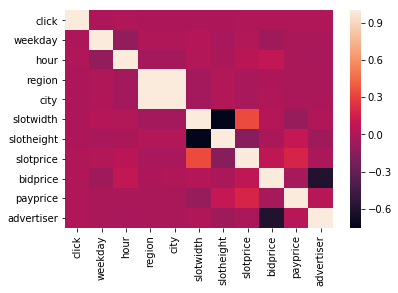

NameError: name 'corr' is not defined

In [19]:
train_corr = correlationFeatures(train)

sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.show()

validation set

In [8]:
validation = pd.read_csv("validation.csv")

In [9]:
Adv_group=validation.groupby(train['advertiser'])
Clicks = Adv_group['click'].sum()
#Clicks
Imps = Adv_group['click'].count()
#Imps
Cost =  Adv_group['payprice'].sum()/1000
#Cost: the unit is fen/one impression, bidprice or payprice is fen oer 1000 impressions
CTR = Clicks/Imps
#CTR
CPM = Cost/Imps
CPM = CPM*1000
#CPM: cost per mille people, so *1000
eCPC = Cost/Clicks
#eCPC
Train_summ = pd.DataFrame({'Imps':Imps, 'Clicks':Clicks, 'Cost':Cost, 'CTR':CTR, 'CPM':CPM, 'eCPC':eCPC})
Train_summ

,CPM,CTR,Clicks,Cost,Imps,eCPC
advertiser,,,,,,
1458,78.440328,0.000653,40,4808.549,61302,120.213725
2259,78.025149,0.000660,11,1299.977,16661,118.179727
2261,77.741875,0.000717,10,1083.644,13939,108.364400
2821,78.893166,0.000794,21,2086.172,26443,99.341524
2997,77.818483,0.000474,3,492.591,6330,164.197000
3358,78.712605,0.000750,25,2623.255,33327,104.930200
3386,77.823944,0.000634,36,4420.400,56800,122.788889
3427,78.157414,0.000713,36,3947.731,50510,109.659194
3476,78.081242,0.000518,20,3014.951,38613,150.747550


# 1.CTR distribution agaginst different features

In [9]:
#set index
ad = train.set_index("advertiser")

In [10]:
#divide the whole data by different 9 advertiser
ad_1458 = ad.loc[1458]
ad_2259 = ad.loc[2259]
ad_2261 = ad.loc[2261]
ad_2821 = ad.loc[2821]
ad_2997 = ad.loc[2997]
ad_3358 = ad.loc[3358]
ad_3386 = ad.loc[3386]
ad_3427 = ad.loc[3427]
ad_3476 = ad.loc[3476]

In [10]:
ad_1458.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'usertag'],
      dtype='object')

In [11]:
#extract information about advertiser 1458 as example
ad_1458.info()
ad_1458.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492353 entries, 1458 to 1458
Data columns (total 24 columns):
click             492353 non-null int64
weekday           492353 non-null int64
hour              492353 non-null int64
bidid             492353 non-null object
userid            492353 non-null object
useragent         492353 non-null object
IP                492353 non-null object
region            492353 non-null int64
city              492353 non-null int64
adexchange        492353 non-null object
domain            492353 non-null object
url               492353 non-null object
urlid             492353 non-null object
slotid            492353 non-null object
slotwidth         492353 non-null int64
slotheight        492353 non-null int64
slotvisibility    492353 non-null object
slotformat        492353 non-null object
slotprice         492353 non-null int64
creative          492353 non-null object
bidprice          492353 non-null int64
payprice          492353 non-null in

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,usertag
advertiser,,,,,,,,,,,,,,,,,,,,,
1458,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1,...,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,"13866,10063,10111"
1458,0,4,17,1be2cf4a47a2a6aee4b0fa64d1b786d3897be4f0,8810fd690f88ddfb797867e3e08e7816f274bd46,windows_ie,119.45.182.*,276,277,1,...,336,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,123,bebefa5efe83beee17a3d245e7c5085b,"10006,10077,10063,10057,10110"
1458,0,3,16,f7c1d8ea177211249456c79e194617ce107bc077,9b539ba886146562a3991fd9f94bb9f9bad1f647,windows_ie,118.75.92.*,15,19,1,...,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,134,bebefa5efe83beee17a3d245e7c5085b,"10063,10024,13800,13866,10006,10111"
1458,0,5,14,9e97694096fe8692851048a893231a7f7ff87922,ddc9c85b6a5726aafaa4c42239e90fb7a44a88d7,windows_ie,61.185.128.*,333,342,3,...,1000,90,0,0,70,832b91d59d0cb5731431653204a76c0e,300,70,bebefa5efe83beee17a3d245e7c5085b,"10063,10006,10083,10110"
1458,0,2,21,83be02e32b55209c39ae3f0b76f0149f73585910,f39780ed2b506f3683ada7995ce789b95e2bf85b,windows_ie,114.139.26.*,298,301,1,...,336,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,null


weekday

In [6]:
#take ad_1458 as example
weekday_count_ad_1458 = pd.DataFrame(ad_1458.groupby('weekday').size().rename('Impression').reset_index())
weekday_count_ad_1458.info()
weekday_count_ad_1458

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
weekday       7 non-null int64
Impression    7 non-null int64
dtypes: int64(2)
memory usage: 192.0 bytes


,weekday,Impression
0,0,76372
1,1,66245
2,2,67985
3,3,68874
4,4,69881
5,5,71634
6,6,71362


In [7]:
weekday_click_ad_1458 = ad_1458.groupby("weekday").agg({"click":"sum"})
weekday_click_ad_1458

,click
weekday,
0,52
1,63
2,48
3,52
4,62
5,62
6,46


In [8]:
#merge the two tables above for calculation the CTR
weekday_new_ad_1458 = weekday_count_ad_1458.join(weekday_click_ad_1458, on="weekday")
weekday_new_ad_1458

,weekday,Impression,click
0,0,76372,52
1,1,66245,63
2,2,67985,48
3,3,68874,52
4,4,69881,62
5,5,71634,62
6,6,71362,46


In [9]:
CTR_ad_1458 = pd.DataFrame(weekday_new_ad_1458.click/weekday_new_ad_1458.Impression)
CTR_ad_1458.columns=["CTR"]
CTR_ad_1458
CTR_ad_1458 = weekday_new_ad_1458.join(CTR_ad_1458)
CTR_ad_1458

,weekday,Impression,click,CTR
0,0,76372,52,0.000681
1,1,66245,63,0.000951
2,2,67985,48,0.000706
3,3,68874,52,0.000755
4,4,69881,62,0.000887
5,5,71634,62,0.000866
6,6,71362,46,0.000645


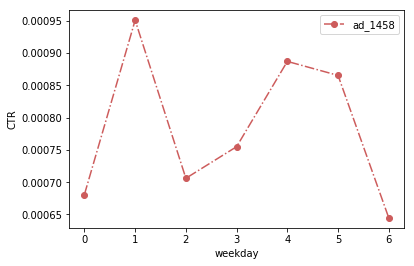

In [10]:
x = CTR_ad_1458["weekday"]
plt.plot(x, CTR_ad_1458["CTR"],label = "ad_1458", color="indianred",linestyle = "dashdot",marker = 'o')
plt.xlabel("weekday")
plt.ylabel("CTR")
plt.legend()
plt.show()

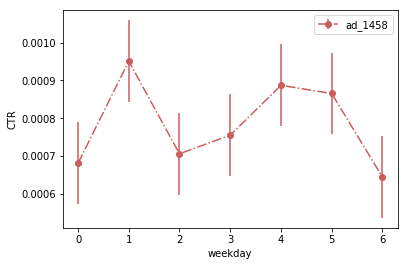

In [11]:
#errorbar
x = CTR_ad_1458["weekday"]
plt.errorbar(x, CTR_ad_1458["CTR"],np.std(CTR_ad_1458["CTR"]),label = "ad_1458", color="indianred",linestyle = "dashdot",marker = 'o')
plt.xlabel("weekday")
plt.ylabel("CTR")
plt.legend()
plt.show()

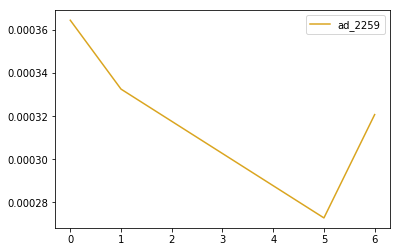

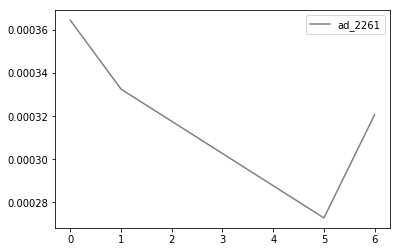

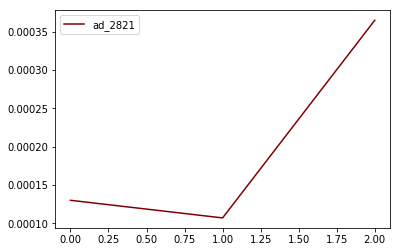

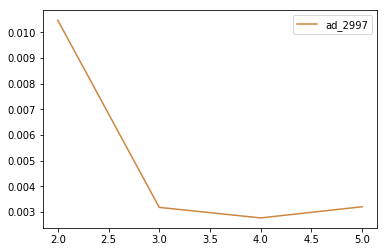

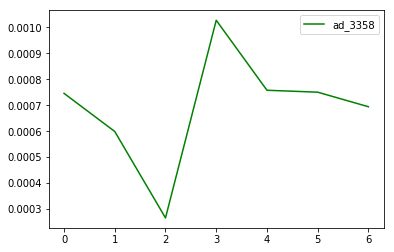

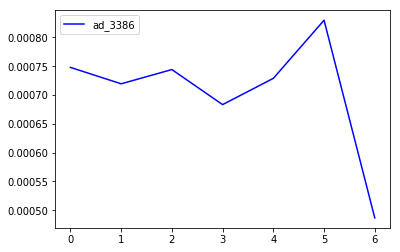

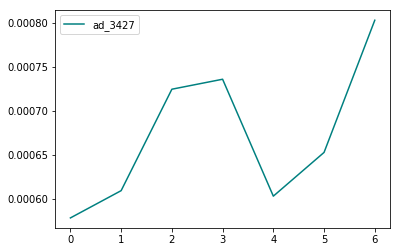

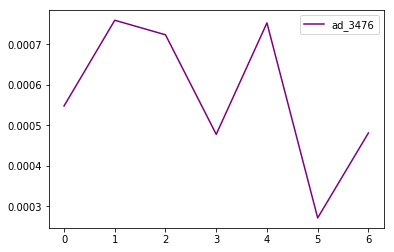

In [12]:
#some operation for other advertisers
#ad_2259
weekday_count_ad_2259 = pd.DataFrame(ad_2259.groupby('weekday').size().rename('Impression').reset_index())
weekday_click_ad_2259 = ad_2259.groupby("weekday").agg({"click":"sum"})
weekday_new_ad_2259 = weekday_count_ad_2259.join(weekday_click_ad_2259, on="weekday")
CTR_ad_2259 = pd.DataFrame(weekday_new_ad_2259.click/weekday_new_ad_2259.Impression)
CTR_ad_2259.columns=["CTR"]

CTR_ad_2259 = weekday_new_ad_2259.join(CTR_ad_2259)

x = CTR_ad_2259["weekday"]
plt.plot(x, CTR_ad_2259["CTR"],label = "ad_2259",color="goldenrod")

plt.legend()
plt.show()

#ad_2261 
weekday_count_ad_2261 = pd.DataFrame(ad_2261.groupby('weekday').size().rename('Impression').reset_index())
weekday_click_ad_2261 = ad_2261.groupby("weekday").agg({"click":"sum"})
weekday_new_ad_2261 = weekday_count_ad_2259.join(weekday_click_ad_2259, on="weekday")
CTR_ad_2261 = pd.DataFrame(weekday_new_ad_2261.click/weekday_new_ad_2261.Impression)
CTR_ad_2261.columns=["CTR"]

CTR_ad_2261 = weekday_new_ad_2261.join(CTR_ad_2261)

x = CTR_ad_2261["weekday"]
plt.plot(x, CTR_ad_2261["CTR"],label ="ad_2261", color = "gray")

plt.legend()
plt.show()

#ad_2821 
weekday_count_ad_2821  = pd.DataFrame(ad_2821 .groupby('weekday').size().rename('Impression').reset_index())
weekday_click_ad_2821  = ad_2821 .groupby("weekday").agg({"click":"sum"})
weekday_new_ad_2821  = weekday_count_ad_2821 .join(weekday_click_ad_2821 , on="weekday")
CTR_ad_2821  = pd.DataFrame(weekday_new_ad_2259.click/weekday_new_ad_2821 .Impression)
CTR_ad_2821.columns=["CTR"]

CTR_ad_2821  = weekday_new_ad_2821 .join(CTR_ad_2821)

x = CTR_ad_2821["weekday"]
plt.plot(x, CTR_ad_2821["CTR"],label = "ad_2821", color = "maroon")

plt.legend()
plt.show()

#ad_2997 
weekday_count_ad_2997  = pd.DataFrame(ad_2997 .groupby('weekday').size().rename('Impression').reset_index())
weekday_click_ad_2997  = ad_2997 .groupby("weekday").agg({"click":"sum"})
weekday_new_ad_2997  = weekday_count_ad_2997.join(weekday_click_ad_2997, on="weekday")
CTR_ad_2997  = pd.DataFrame(weekday_new_ad_2997.click/weekday_new_ad_2997.Impression)
CTR_ad_2997.columns=["CTR"]

CTR_ad_2997 = weekday_new_ad_2997.join(CTR_ad_2997)

x = CTR_ad_2997["weekday"]
plt.plot(x, CTR_ad_2997["CTR"],label = "ad_2997", color = "peru")

plt.legend()
plt.show()

#ad_3358 
weekday_count_ad_3358 = pd.DataFrame(ad_3358.groupby('weekday').size().rename('Impression').reset_index())
weekday_click_ad_3358 = ad_3358.groupby("weekday").agg({"click":"sum"})
weekday_new_ad_3358 = weekday_count_ad_3358.join(weekday_click_ad_3358, on="weekday")
CTR_ad_3358 = pd.DataFrame(weekday_new_ad_3358.click/weekday_new_ad_3358.Impression)
CTR_ad_3358.columns=["CTR"]

CTR_ad_3358 = weekday_new_ad_3358.join(CTR_ad_3358)

x = CTR_ad_3358["weekday"]
plt.plot(x, CTR_ad_3358["CTR"],label = "ad_3358", color = "green")

plt.legend()
plt.show()

#ad_3386 
weekday_count_ad_3386 = pd.DataFrame(ad_3386.groupby('weekday').size().rename('Impression').reset_index())
weekday_click_ad_3386 = ad_3386.groupby("weekday").agg({"click":"sum"})
weekday_new_ad_3386 = weekday_count_ad_3386.join(weekday_click_ad_3386, on="weekday")
CTR_ad_3386 = pd.DataFrame(weekday_new_ad_3386.click/weekday_new_ad_3386.Impression)
CTR_ad_3386.columns=["CTR"]

CTR_ad_3386 = weekday_new_ad_3386.join(CTR_ad_3386)

x = CTR_ad_3386["weekday"]
plt.plot(x, CTR_ad_3386["CTR"],label = "ad_3386", color = "blue")

plt.legend()
plt.show()

#ad_3427 
weekday_count_ad_3427 = pd.DataFrame(ad_3427.groupby('weekday').size().rename('Impression').reset_index())
weekday_click_ad_3427 = ad_3427.groupby("weekday").agg({"click":"sum"})
weekday_new_ad_3427 = weekday_count_ad_3427.join(weekday_click_ad_3427, on="weekday")
CTR_ad_3427 = pd.DataFrame(weekday_new_ad_3427.click/weekday_new_ad_3427.Impression)
CTR_ad_3427.columns=["CTR"]

CTR_ad_3427 = weekday_new_ad_3427.join(CTR_ad_3427)

x = CTR_ad_3427["weekday"]
plt.plot(x, CTR_ad_3427["CTR"],label = "ad_3427", color = "teal")

plt.legend()
plt.show()

#ad_3476 
weekday_count_ad_3476 = pd.DataFrame(ad_3476.groupby('weekday').size().rename('Impression').reset_index())
weekday_click_ad_3476 = ad_3476.groupby("weekday").agg({"click":"sum"})
weekday_new_ad_3476 = weekday_count_ad_3476.join(weekday_click_ad_3476, on="weekday")
CTR_ad_3476 = pd.DataFrame(weekday_new_ad_3476.click/weekday_new_ad_3476.Impression)
CTR_ad_3476.columns=["CTR"]

CTR_ad_3476 = weekday_new_ad_3476.join(CTR_ad_3476)

x = CTR_ad_3476["weekday"]
plt.plot(x, CTR_ad_3476["CTR"],label = "ad_3476", color = "purple")

plt.legend()
plt.show()


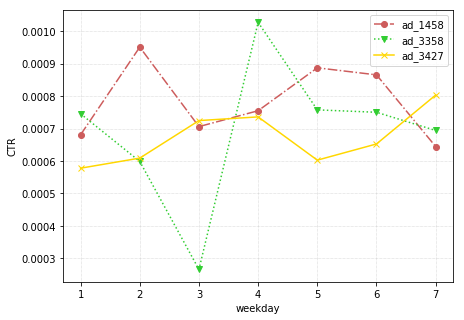

In [13]:
#combination graph
plt.figure(figsize=(7,5))
x=[1,2,3,4,5,6,7]
plt.plot(x, CTR_ad_1458["CTR"],label = "ad_1458", color="indianred",linestyle = '-.',marker = 'o')
plt.plot(x, CTR_ad_3358["CTR"],label = "ad_3358", color = "limegreen",linestyle = ':', marker = "v")
#plt.plot(x, CTR_ad_3386["CTR"],label = "ad_3386", color = "blue")
plt.plot(x, CTR_ad_3427["CTR"],label = "ad_3427", color = "gold",marker = "x")
#plt.plot(x, CTR_ad_3476["CTR"],label = "ad_3476", color = "purple")

plt.xlabel("weekday")
plt.ylabel("CTR")
plt.grid(True, linestyle = ':', linewidth = "0.5") 

plt.legend()
plt.show()

In [14]:
# it is noticed that there are not complete 7 days data for every advertiser

In [54]:
CTR_ad_1458

,weekday,Impression,click,CTR
0,0,76372,52,0.000681
1,1,66245,63,0.000951
2,2,67985,48,0.000706
3,3,68874,52,0.000755
4,4,69881,62,0.000887
5,5,71634,62,0.000866
6,6,71362,46,0.000645


In [55]:
CTR_ad_3358

,weekday,Impression,click,CTR
0,0,29504,22,0.000746
1,1,26723,16,0.000599
2,2,22569,6,0.000266
3,3,71058,73,0.001027
4,4,35638,27,0.000758
5,5,50651,38,0.000750
6,6,28813,20,0.000694


In [56]:
CTR_ad_3386

,weekday,Impression,click,CTR
0,0,70861,53,0.000748
1,1,61159,44,0.000719
2,2,63159,47,0.000744
3,3,61468,42,0.000683
4,4,65854,48,0.000729
5,5,62668,52,0.000830
6,6,69872,34,0.000487


In [57]:
CTR_ad_3427

,weekday,Impression,click,CTR
0,0,50183,29,0.000578
1,1,54189,33,0.000609
2,2,59341,43,0.000725
3,3,57065,42,0.000736
4,4,59731,36,0.000603
5,5,61296,40,0.000653
6,6,61001,49,0.000803


In [58]:
CTR_ad_2259

,weekday,Impression,click,CTR
0,0,35661,13,0.000365
1,1,27061,9,0.000333
2,5,36657,10,0.000273
3,6,34294,11,0.000321


In [59]:
CTR_ad_2261

,weekday,Impression,click,CTR
0,0,35661,13,0.000365
1,1,27061,9,0.000333
2,5,36657,10,0.000273
3,6,34294,11,0.000321


In [60]:
CTR_ad_2997

,weekday,Impression,click,CTR
0,2,8973,94,0.010476
1,3,14469,46,0.003179
2,4,17336,48,0.002769
3,5,9051,29,0.003204


In [61]:
CTR_ad_2821

,weekday,Impression,click,CTR
0,0,99929,70,0.000130
1,1,84043,47,0.000107
2,2,27394,14,0.000365


In [ ]:
#pick up the advertiser you like and combine to the form shown in Figure 2 

hour

In [20]:
len(ad_1458.groupby("hour"))

24

In [21]:
len(ad_2261.groupby("hour"))

19

In [22]:
len(ad_2821.groupby("hour"))

24

In [23]:
len(ad_2997.groupby("hour"))

24

In [24]:
len(ad_3358.groupby("hour"))

24

In [25]:
len(ad_3386.groupby("hour"))

24

In [26]:
len(ad_3427.groupby("hour"))

24

In [27]:
len(ad_3476.groupby("hour"))

24

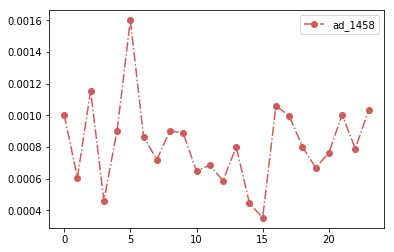

In [28]:
#ad_1458
hour_count_ad_1458 = pd.DataFrame(ad_1458.groupby('hour').size().rename('Impression').reset_index())
hour_click_ad_1458 = ad_1458.groupby("hour").agg({"click":"sum"})
hour_new_ad_1458 = hour_count_ad_1458.join(hour_click_ad_1458, on="hour")
CTR_ad_1458 = pd.DataFrame(hour_new_ad_1458.click/hour_new_ad_1458.Impression)
CTR_ad_1458.columns=["CTR"]

CTR_ad_1458= hour_new_ad_1458.join(CTR_ad_1458)

x = CTR_ad_1458["hour"]
plt.plot(x, CTR_ad_1458["CTR"],label = "ad_1458", color="indianred",linestyle = '-.',marker = 'o')

plt.legend()
plt.show()

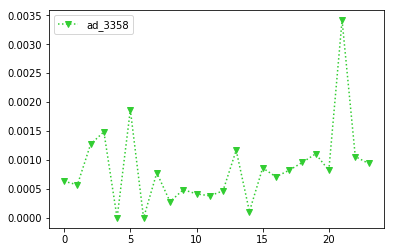

In [29]:
hour_count_ad_3358 = pd.DataFrame(ad_3358.groupby('hour').size().rename('Impression').reset_index())
hour_click_ad_3358 = ad_3358.groupby("hour").agg({"click":"sum"})
hour_new_ad_3358 = hour_count_ad_3358.join(hour_click_ad_3358, on="hour")
CTR_ad_3358 = pd.DataFrame(hour_new_ad_3358.click/hour_new_ad_3358.Impression)
CTR_ad_3358.columns=["CTR"]

CTR_ad_3358= hour_new_ad_3358.join(CTR_ad_3358)

x = CTR_ad_3358["hour"]
plt.plot(x, CTR_ad_3358["CTR"],label = "ad_3358", color = "limegreen",linestyle = ':', marker = "v")

plt.legend()
plt.show()

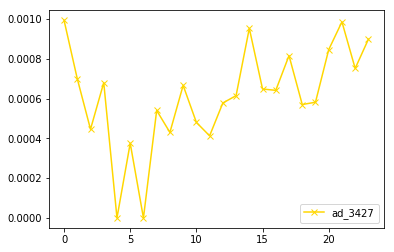

In [30]:
hour_count_ad_3427 = pd.DataFrame(ad_3427.groupby('hour').size().rename('Impression').reset_index())
hour_click_ad_3427 = ad_3427.groupby("hour").agg({"click":"sum"})
hour_new_ad_3427 = hour_count_ad_3427.join(hour_click_ad_3427, on="hour")
CTR_ad_3427 = pd.DataFrame(hour_new_ad_3427.click/hour_new_ad_3427.Impression)
CTR_ad_3427.columns=["CTR"]

CTR_ad_3427= hour_new_ad_3427.join(CTR_ad_3427)

x = CTR_ad_3427["hour"]
plt.plot(x, CTR_ad_3427["CTR"],label = "ad_3427", color = "gold",marker = "x")

plt.legend()
plt.show()

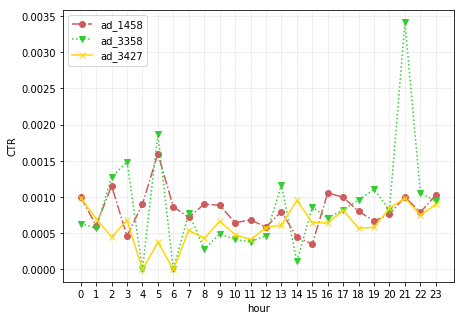

In [33]:
#combination graph

x=range(0,24)

plt.figure(figsize=(7,5))

plt.plot(x, CTR_ad_1458["CTR"],label = "ad_1458", color="indianred",linestyle = '-.',marker = 'o')
plt.plot(x, CTR_ad_3358["CTR"],label = "ad_3358", color = "limegreen",linestyle = ':', marker = "v")
plt.plot(x, CTR_ad_3427["CTR"],label = "ad_3427", color = "gold",marker = "x")

plt.xlabel("hour")
plt.ylabel("CTR")
plt.grid(True, linestyle = ':', linewidth = "0.5") 

plt.xticks(np.linspace(0, 23, 24))

plt.legend()
plt.show()

region

In [43]:
#has already done at the beginning, just repeated here (not necessary), donot need to run this
ad_1458 = ad.loc[1458]
ad_2259 = ad.loc[2259]
ad_2261 = ad.loc[2261]
ad_2821 = ad.loc[2821]
ad_2997 = ad.loc[2997]
ad_3358 = ad.loc[3358]
ad_3386 = ad.loc[3386]
ad_3427 = ad.loc[3427]
ad_3476 = ad.loc[3476]

In [44]:
#take ad_1458 as example to see the pattern
ad_1458.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,usertag
advertiser,,,,,,,,,,,,,,,,,,,,,
1458,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1,...,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,"13866,10063,10111"
1458,0,4,17,1be2cf4a47a2a6aee4b0fa64d1b786d3897be4f0,8810fd690f88ddfb797867e3e08e7816f274bd46,windows_ie,119.45.182.*,276,277,1,...,336,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,123,bebefa5efe83beee17a3d245e7c5085b,"10006,10077,10063,10057,10110"
1458,0,3,16,f7c1d8ea177211249456c79e194617ce107bc077,9b539ba886146562a3991fd9f94bb9f9bad1f647,windows_ie,118.75.92.*,15,19,1,...,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,134,bebefa5efe83beee17a3d245e7c5085b,"10063,10024,13800,13866,10006,10111"
1458,0,5,14,9e97694096fe8692851048a893231a7f7ff87922,ddc9c85b6a5726aafaa4c42239e90fb7a44a88d7,windows_ie,61.185.128.*,333,342,3,...,1000,90,0,0,70,832b91d59d0cb5731431653204a76c0e,300,70,bebefa5efe83beee17a3d245e7c5085b,"10063,10006,10083,10110"
1458,0,2,21,83be02e32b55209c39ae3f0b76f0149f73585910,f39780ed2b506f3683ada7995ce789b95e2bf85b,windows_ie,114.139.26.*,298,301,1,...,336,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,null


In [45]:
ad_1458.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'usertag'],
      dtype='object')

In [46]:
ad_1458["region"].unique()

array([  1, 276,  15, 333, 298,  80,  94,  79, 106,   3,  40, 216, 183,
       308, 374, 146, 164,  55, 238,  27, 253, 201, 124,  65, 134,   0,
       275,   2, 394, 344, 325, 368, 359, 393, 395], dtype=int64)

In [47]:
len(ad_1458.groupby("region"))

35

In [48]:
len(ad_2259.groupby("region")) #too small, not use

1

In [49]:
len(ad_2261.groupby("region"))

35

In [50]:
len(ad_2821.groupby("region"))

35

In [51]:
len(ad_2997.groupby("region")) # need to consider whether use

34

In [52]:
len(ad_3358.groupby("region"))

35

In [53]:
len(ad_3386.groupby("region"))

35

In [54]:
len(ad_3427.groupby("region"))

35

In [55]:
len(ad_3476.groupby("region"))

35

In [56]:
region_1458 = ad_1458.groupby("region")
#region_1458['click'].agg({"count":np.sum})

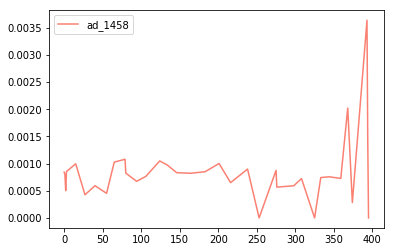

In [57]:
#ad_1458
region_count_ad_1458 = pd.DataFrame(ad_1458.groupby('region').size().rename('Impression').reset_index())
region_click_ad_1458 = ad_1458.groupby("region").agg({"click":"sum"})
region_new_ad_1458 = region_count_ad_1458.join(region_click_ad_1458, on="region")
CTR_ad_1458 = pd.DataFrame(region_new_ad_1458.click/region_new_ad_1458.Impression)
CTR_ad_1458.columns=["CTR"]

CTR_ad_1458= region_new_ad_1458.join(CTR_ad_1458)

x = CTR_ad_1458["region"]
plt.plot(x, CTR_ad_1458["CTR"],label = "ad_1458", color = "salmon")

plt.legend()
plt.show()

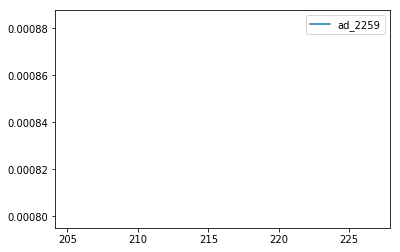

In [59]:
#ad_2259
region_count_ad_2259 = pd.DataFrame(ad_2259.groupby('region').size().rename('Impression').reset_index())
region_click_ad_2259 = ad_1458.groupby("region").agg({"click":"sum"})
region_new_ad_2259 = region_count_ad_2259.join(region_click_ad_2259, on="region")
CTR_ad_2259 = pd.DataFrame(region_new_ad_1458.click/region_new_ad_1458.Impression)
CTR_ad_2259.columns=["CTR"]

CTR_ad_2259= region_new_ad_2259.join(CTR_ad_2259)

x = CTR_ad_2259["region"]
plt.plot(x, CTR_ad_2259["CTR"],label = "ad_2259")

plt.legend()
plt.show()
#reason: just has one region
#ignore this one

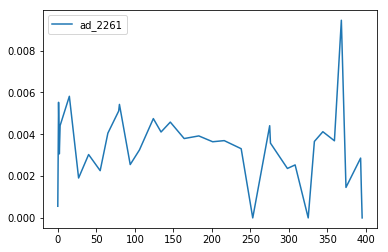

In [60]:
#ad_2261
region_count_ad_2261 = pd.DataFrame(ad_2261.groupby('region').size().rename('Impression').reset_index())
region_click_ad_2261 = ad_2261.groupby("region").agg({"click":"sum"})
region_new_ad_2261 = region_count_ad_2261.join(region_click_ad_2261, on="region")
CTR_ad_2261 = pd.DataFrame(region_new_ad_1458.click/region_new_ad_2261.Impression)
CTR_ad_2261.columns=["CTR"]

CTR_ad_2261= region_new_ad_2261.join(CTR_ad_2261)

x = CTR_ad_2261["region"]
plt.plot(x, CTR_ad_2261["CTR"],label = "ad_2261")

plt.legend()
plt.show()

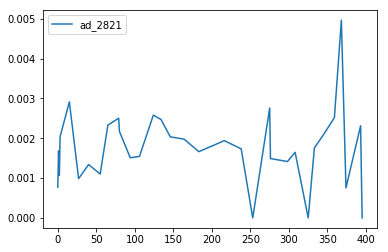

In [61]:
region_count_ad_2821 = pd.DataFrame(ad_2821.groupby('region').size().rename('Impression').reset_index())
region_click_ad_2821 = ad_1458.groupby("region").agg({"click":"sum"})
region_new_ad_2821 = region_count_ad_2821.join(region_click_ad_2821, on="region")
CTR_ad_2821 = pd.DataFrame(region_new_ad_2821.click/region_new_ad_2821.Impression)
CTR_ad_2821.columns=["CTR"]

CTR_ad_2821= region_new_ad_2821.join(CTR_ad_2821)

x = CTR_ad_2821["region"]
plt.plot(x, CTR_ad_2821["CTR"],label = "ad_2821")

plt.legend()
plt.show()

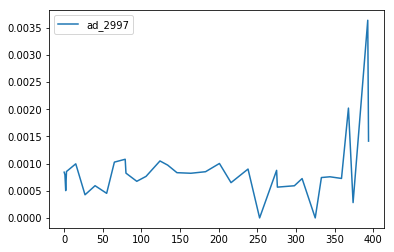

In [62]:
region_count_ad_2997 = pd.DataFrame(ad_2997.groupby('region').size().rename('Impression').reset_index())
region_click_ad_2997 = ad_1458.groupby("region").agg({"click":"sum"})
region_new_ad_2997 = region_count_ad_2997.join(region_click_ad_1458, on="region")
CTR_ad_2997 = pd.DataFrame(region_new_ad_2997.click/region_new_ad_1458.Impression)
CTR_ad_2997.columns=["CTR"]

CTR_ad_2997= region_new_ad_2997.join(CTR_ad_2997)

x = CTR_ad_2997["region"]
plt.plot(x, CTR_ad_2997["CTR"],label = "ad_2997")

plt.legend()
plt.show()

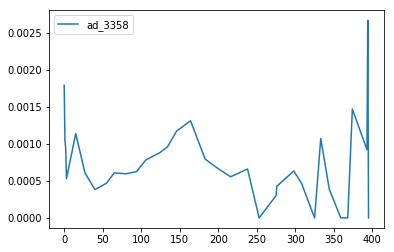

In [63]:
region_count_ad_3358 = pd.DataFrame(ad_3358.groupby('region').size().rename('Impression').reset_index())
region_click_ad_3358 = ad_3358.groupby("region").agg({"click":"sum"})
region_new_ad_3358 = region_count_ad_3358.join(region_click_ad_3358, on="region")
CTR_ad_3358 = pd.DataFrame(region_new_ad_3358.click/region_new_ad_3358.Impression)
CTR_ad_3358.columns=["CTR"]

CTR_ad_3358= region_new_ad_3358.join(CTR_ad_3358)

x = CTR_ad_3358["region"]
plt.plot(x, CTR_ad_3358["CTR"],label = "ad_3358")

plt.legend()
plt.show()

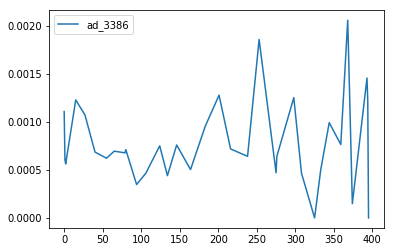

In [64]:
region_count_ad_3386 = pd.DataFrame(ad_3386.groupby('region').size().rename('Impression').reset_index())
region_click_ad_3386 = ad_3386.groupby("region").agg({"click":"sum"})
region_new_ad_3386= region_count_ad_3386.join(region_click_ad_3386, on="region")
CTR_ad_3386 = pd.DataFrame(region_new_ad_3386.click/region_new_ad_3386.Impression)
CTR_ad_3386.columns=["CTR"]

CTR_ad_3386= region_new_ad_3386.join(CTR_ad_3386)

x = CTR_ad_3386["region"]
plt.plot(x, CTR_ad_3386["CTR"],label = "ad_3386",)

plt.legend()
plt.show()

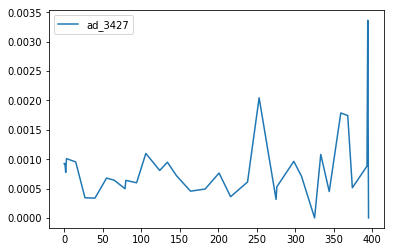

In [65]:
region_count_ad_3427 = pd.DataFrame(ad_3427.groupby('region').size().rename('Impression').reset_index())
region_click_ad_3427 = ad_3427.groupby("region").agg({"click":"sum"})
region_new_ad_3427 = region_count_ad_3427.join(region_click_ad_3427, on="region")
CTR_ad_3427 = pd.DataFrame(region_new_ad_3427.click/region_new_ad_3427.Impression)
CTR_ad_3427.columns=["CTR"]

CTR_ad_3427= region_new_ad_1458.join(CTR_ad_3427)

x = CTR_ad_3427["region"]
plt.plot(x, CTR_ad_3427["CTR"],label = "ad_3427")

plt.legend()
plt.show()

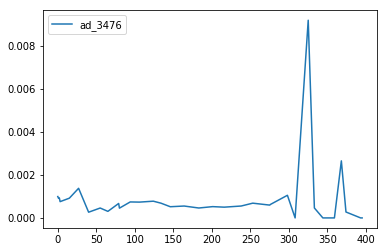

In [66]:
region_count_ad_3476 = pd.DataFrame(ad_3476.groupby('region').size().rename('Impression').reset_index())
region_click_ad_3476 = ad_3476.groupby("region").agg({"click":"sum"})
region_new_ad_3476 = region_count_ad_3476.join(region_click_ad_3476, on="region")
CTR_ad_3476 = pd.DataFrame(region_new_ad_3476.click/region_new_ad_3476.Impression)
CTR_ad_3476.columns=["CTR"]

CTR_ad_3476= region_new_ad_3476.join(CTR_ad_3476)

x = CTR_ad_3476["region"]
plt.plot(x, CTR_ad_3476["CTR"],label = "ad_3476")

plt.legend()
plt.show()

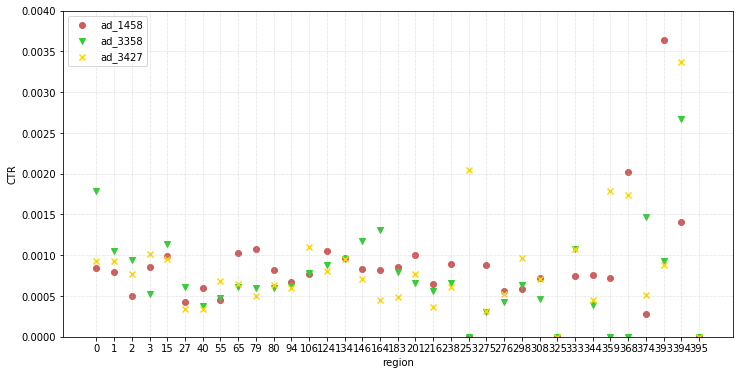

In [75]:
#combined graph
plt.figure(figsize=(12,6))

x=range(0, len(train.groupby("region")))
odinate=[  0,   1,   2,   3,  15,  27,  40,  55,  65,  79,  80,  94, 106,
       124, 134, 146, 164, 183, 201, 216, 238, 253, 275, 276, 298, 308,
       325, 333, 344, 359, 368, 374, 393, 394, 395]

plt.scatter(x, CTR_ad_1458["CTR"],label = "ad_1458", color="indianred",marker = 'o')
plt.scatter(x, CTR_ad_3358["CTR"],label = "ad_3358", color = "limegreen", marker = "v")
plt.scatter(x, CTR_ad_3427["CTR"],label = "ad_3427", color = "gold",marker = "x")

plt.xlabel("region")
plt.ylabel("CTR")
plt.ylim(0, 0.004)

plt.xticks(x, odinate)
plt.grid(True, linestyle = ':', linewidth = "0.5") 

plt.legend()
plt.show()

city

In [41]:
len(train.groupby("city"))

370

In [42]:
len(ad_1458.groupby("city"))

370

In [50]:
len(ad_2259.groupby("city"))

22

In [51]:
len(ad_2261.groupby("city"))

368

In [52]:
len(ad_2821.groupby("city"))

370

In [53]:
len(ad_2997.groupby("city"))

361

In [55]:
len(ad_3358.groupby("city"))

370

In [54]:
len(ad_3386.groupby("city"))

370

In [57]:
len(ad_3427.groupby("city"))

370

In [58]:
len(ad_3476.groupby("city"))

370

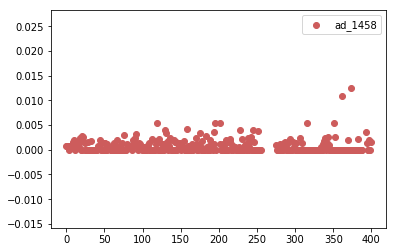

In [176]:
city_count_ad_1458 = pd.DataFrame(ad_1458.groupby('city').size().rename('Impression').reset_index())
city_click_ad_1458 = ad_1458.groupby("city").agg({"click":"sum"})
city_new_ad_1458 = city_count_ad_1458.join(city_click_ad_1458, on="city")
CTR_ad_1458 = pd.DataFrame(city_new_ad_1458.click/city_new_ad_1458.Impression)
CTR_ad_1458.columns=["CTR"]

CTR_ad_1458= city_new_ad_1458.join(CTR_ad_1458)

x = CTR_ad_1458["city"]
plt.scatter(x, CTR_ad_1458["CTR"],label = "ad_1458", color="indianred",marker = 'o')

plt.legend()
plt.show()

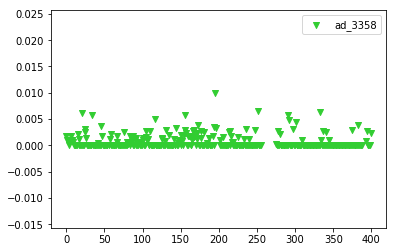

In [177]:
city_count_ad_3358 = pd.DataFrame(ad_3358.groupby('city').size().rename('Impression').reset_index())
city_click_ad_3358 = ad_3358.groupby("city").agg({"click":"sum"})
city_new_ad_3358 = city_count_ad_3358.join(city_click_ad_3358, on="city")
CTR_ad_3358 = pd.DataFrame(city_new_ad_3358.click/city_new_ad_3358.Impression)
CTR_ad_3358.columns=["CTR"]

CTR_ad_3358= city_new_ad_3358.join(CTR_ad_3358)

x = CTR_ad_3358["city"]
plt.scatter(x, CTR_ad_3358["CTR"],label = "ad_3358", color = "limegreen",marker = "v")

plt.legend()
plt.show()

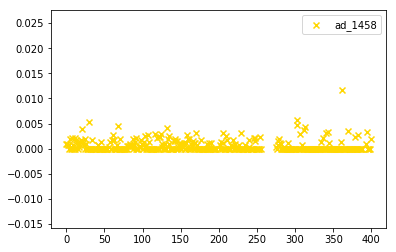

In [178]:
city_count_ad_3427 = pd.DataFrame(ad_3427.groupby('city').size().rename('Impression').reset_index())
city_click_ad_3427 = ad_3427.groupby("city").agg({"click":"sum"})
city_new_ad_3427 = city_count_ad_3427.join(city_click_ad_3427, on="city")
CTR_ad_3427 = pd.DataFrame(city_new_ad_3427.click/city_new_ad_3427.Impression)
CTR_ad_3427.columns=["CTR"]

CTR_ad_3427= city_new_ad_3427.join(CTR_ad_3427)

x = CTR_ad_3427["city"]
plt.scatter(x, CTR_ad_3427["CTR"],label = "ad_1458", color = "gold",marker = "x")

plt.legend()
plt.show()

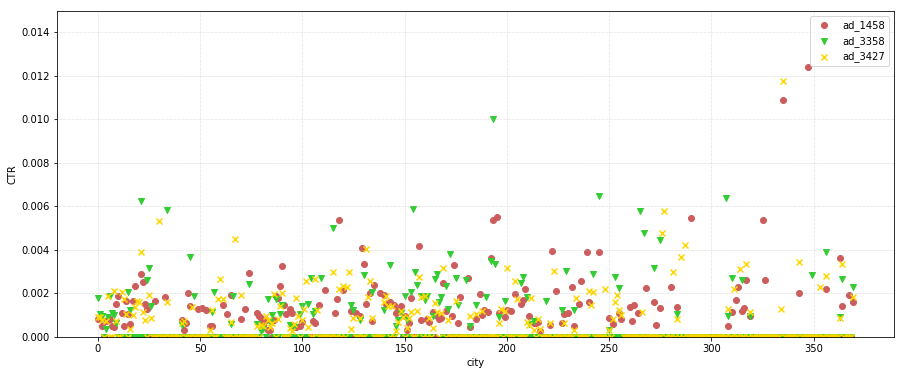

In [179]:
plt.figure(figsize=(15,6))

x=range(0, len(train.groupby("city")))

plt.scatter(x, CTR_ad_1458["CTR"],label = "ad_1458", color="indianred",marker = 'o')
plt.scatter(x, CTR_ad_3358["CTR"],label = "ad_3358", color = "limegreen", marker = "v")
plt.scatter(x, CTR_ad_3427["CTR"],label = "ad_3427", color = "gold",marker = "x")

plt.xlabel("city")
plt.ylabel("CTR")
plt.ylim(0,0.015)

#plt.xticks(np.linspace(0,370,10))

plt.grid(True, linestyle = ':', linewidth = "0.5") 

plt.legend()
plt.show()

ad exchange

In [105]:
ad_1458.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,usertag
advertiser,,,,,,,,,,,,,,,,,,,,,
1458,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1,...,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,"13866,10063,10111"
1458,0,4,17,1be2cf4a47a2a6aee4b0fa64d1b786d3897be4f0,8810fd690f88ddfb797867e3e08e7816f274bd46,windows_ie,119.45.182.*,276,277,1,...,336,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,123,bebefa5efe83beee17a3d245e7c5085b,"10006,10077,10063,10057,10110"
1458,0,3,16,f7c1d8ea177211249456c79e194617ce107bc077,9b539ba886146562a3991fd9f94bb9f9bad1f647,windows_ie,118.75.92.*,15,19,1,...,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,134,bebefa5efe83beee17a3d245e7c5085b,"10063,10024,13800,13866,10006,10111"
1458,0,5,14,9e97694096fe8692851048a893231a7f7ff87922,ddc9c85b6a5726aafaa4c42239e90fb7a44a88d7,windows_ie,61.185.128.*,333,342,3,...,1000,90,0,0,70,832b91d59d0cb5731431653204a76c0e,300,70,bebefa5efe83beee17a3d245e7c5085b,"10063,10006,10083,10110"
1458,0,2,21,83be02e32b55209c39ae3f0b76f0149f73585910,f39780ed2b506f3683ada7995ce789b95e2bf85b,windows_ie,114.139.26.*,298,301,1,...,336,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,null


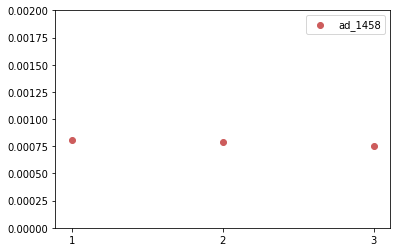

In [111]:
adex_count_ad_1458 = pd.DataFrame(ad_1458.groupby('adexchange').size().rename('Impression').reset_index())
adex_click_ad_1458 = ad_1458.groupby("adexchange").agg({"click":"sum"})
adex_new_ad_1458 = adex_count_ad_1458.join(adex_click_ad_1458, on="adexchange")
CTR_ad_1458 = pd.DataFrame(adex_new_ad_1458.click/adex_new_ad_1458.Impression)
CTR_ad_1458.columns=["CTR"]

CTR_ad_1458= adex_new_ad_1458.join(CTR_ad_1458)

x = [1,2,3]
plt.scatter(x, CTR_ad_1458["CTR"],label = "ad_1458", color="indianred",marker = 'o')
plt.xticks(np.linspace(1,3,3))
plt.ylim(0,0.002)

plt.legend()
plt.show()

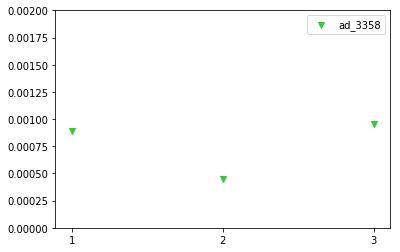

In [112]:
adex_count_ad_3358 = pd.DataFrame(ad_3358.groupby('adexchange').size().rename('Impression').reset_index())
adex_click_ad_3358 = ad_3358.groupby("adexchange").agg({"click":"sum"})
adex_new_ad_3358 = adex_count_ad_3358.join(adex_click_ad_3358, on="adexchange")
CTR_ad_3358 = pd.DataFrame(adex_new_ad_3358.click/adex_new_ad_3358.Impression)
CTR_ad_3358.columns=["CTR"]

CTR_ad_3358= adex_new_ad_3358.join(CTR_ad_3358)

x = [1,2,3]
plt.scatter(x, CTR_ad_3358["CTR"],label = "ad_3358", color = "limegreen", marker = "v")
plt.xticks(np.linspace(1,3,3))
plt.ylim(0,0.002)

plt.legend()
plt.show()

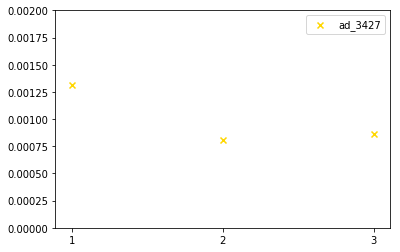

In [113]:
adex_count_ad_3427 = pd.DataFrame(ad_3427.groupby('adexchange').size().rename('Impression').reset_index())
adex_click_ad_3427 = ad_3427.groupby("adexchange").agg({"click":"sum"})
adex_new_ad_3427 = adex_count_ad_3427.join(adex_click_ad_3427, on="adexchange")
CTR_ad_3427 = pd.DataFrame(adex_new_ad_1458.click/adex_new_ad_3427.Impression)
CTR_ad_3427.columns=["CTR"]

CTR_ad_3427= adex_new_ad_3427.join(CTR_ad_3427)

x = [1,2,3]
plt.scatter(x, CTR_ad_3427["CTR"],label = "ad_3427", color = "gold",marker = "x")
plt.xticks(np.linspace(1,3,3))
plt.ylim(0,0.002)

plt.legend()
plt.show()

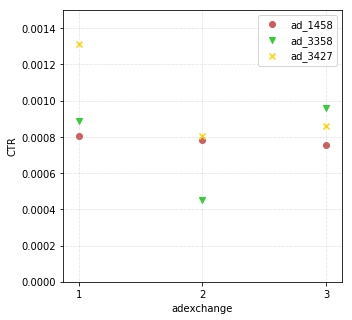

In [118]:
plt.figure(figsize=(5,5))
plt.scatter(x, CTR_ad_1458["CTR"],label = "ad_1458", color="indianred",marker = 'o')
plt.scatter(x, CTR_ad_3358["CTR"],label = "ad_3358", color = "limegreen", marker = "v")
plt.scatter(x, CTR_ad_3427["CTR"],label = "ad_3427", color = "gold",marker = "x")

plt.xlabel("adexchange")
plt.ylabel("CTR")
plt.grid(True, linestyle = ':', linewidth = "0.5") 

plt.ylim(0, 0.00150)

plt.xticks(np.linspace(1, 3, 3))

plt.legend()
plt.show()

slot size

In [11]:
e=[]

for index, row in train.iterrows():
    e.append(str(row["slotwidth"])+str("*")+str(row["slotheight"]))
    
train.insert(15, 'slot size', e)

In [12]:
train_new = train
train_new.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1,...,250,FourthView,Na,0,10722,294,23,null,2821,null
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2,...,90,OtherView,Na,133,7330,277,133,null,2259,null


In [13]:
train_new.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slot size', 'slotheight', 'slotvisibility', 'slotformat',
       'slotprice', 'creative', 'bidprice', 'payprice', 'keypage',
       'advertiser', 'usertag'],
      dtype='object')

In [14]:
ad_add = train_new.set_index("advertiser")
ad_add_1458 = ad_add.loc[1458]
ad_add_2259 = ad_add.loc[2259]
ad_add_2261 = ad_add.loc[2261]
ad_add_2821 = ad_add.loc[2821]
ad_add_2997 = ad_add.loc[2997]
ad_add_3358 = ad_add.loc[3358]
ad_add_3386 = ad_add.loc[3386]
ad_add_3427 = ad_add.loc[3427]
ad_add_3476 = ad_add.loc[3476]

In [15]:
ad_add_1458.groupby("slot size").count()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,usertag
slot size,,,,,,,,,,,,,,,,,,,,,
1000*90,133077,133077,133077,133077,133077,133077,133077,133077,133077,133077,...,133077,133077,133077,133077,133077,133077,133077,133077,133077,133077
160*600,53706,53706,53706,53706,53706,53706,53706,53706,53706,53706,...,53706,53706,53706,53706,53706,53706,53706,53706,53706,53706
250*250,25201,25201,25201,25201,25201,25201,25201,25201,25201,25201,...,25201,25201,25201,25201,25201,25201,25201,25201,25201,25201
300*250,33868,33868,33868,33868,33868,33868,33868,33868,33868,33868,...,33868,33868,33868,33868,33868,33868,33868,33868,33868,33868
336*280,106436,106436,106436,106436,106436,106436,106436,106436,106436,106436,...,106436,106436,106436,106436,106436,106436,106436,106436,106436,106436
468*60,19786,19786,19786,19786,19786,19786,19786,19786,19786,19786,...,19786,19786,19786,19786,19786,19786,19786,19786,19786,19786
728*90,107449,107449,107449,107449,107449,107449,107449,107449,107449,107449,...,107449,107449,107449,107449,107449,107449,107449,107449,107449,107449
960*90,12830,12830,12830,12830,12830,12830,12830,12830,12830,12830,...,12830,12830,12830,12830,12830,12830,12830,12830,12830,12830


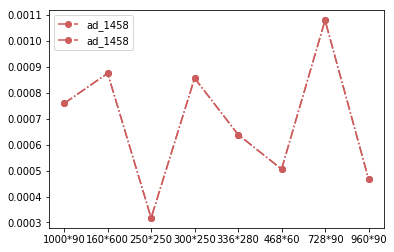

In [17]:
ss_count_ad_1458 = pd.DataFrame(ad_add_1458.groupby('slot size').size().rename('Impression').reset_index())
ss_click_ad_1458 = ad_add_1458.groupby("slot size").agg({"click":"sum"})
ss_new_ad_1458 = ss_count_ad_1458.join(ss_click_ad_1458, on="slot size")
CTR_ad_1458 = pd.DataFrame(ss_new_ad_1458.click/ss_new_ad_1458.Impression)
CTR_ad_1458.columns=["CTR"]

CTR_ad_1458 = ss_new_ad_1458.join(CTR_ad_1458)

ori_1458 = CTR_ad_1458["slot size"]
x_1458 = range(len(ori_1458))
y_1458 = CTR_ad_1458["CTR"]

plt.plot(x_1458, y_1458,label = "ad_1458",color="indianred",linestyle = '-.',marker = 'o')
plt.xticks(x_1458, ori_1458)


plt.legend()
plt.show()

In [18]:
ori_1458

0    1000*90
1    160*600
2    250*250
3    300*250
4    336*280
5     468*60
6     728*90
7     960*90
Name: slot size, dtype: object

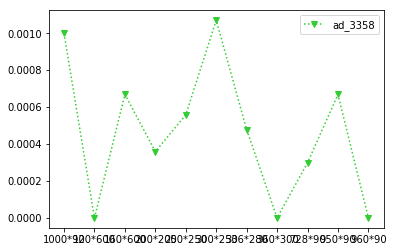

In [22]:
ss_count_ad_3358 = pd.DataFrame(ad_add_3358.groupby('slot size').size().rename('Impression').reset_index())
ss_click_ad_3358 = ad_add_3358.groupby("slot size").agg({"click":"sum"})
ss_new_ad_3358 = ss_count_ad_3358.join(ss_click_ad_3358, on="slot size")
CTR_ad_3358 = pd.DataFrame(ss_new_ad_3358.click/ss_new_ad_3358.Impression)
CTR_ad_3358.columns=["CTR"]

CTR_ad_3358 = ss_new_ad_3358.join(CTR_ad_3358)

ori_3358 = CTR_ad_3358["slot size"]
x_3358 = range(len(ori_3358))
y_3358 = CTR_ad_3358["CTR"]

plt.plot(x_3358, y_3358,label = "ad_3358",color = "limegreen",linestyle = ':', marker = "v")
plt.xticks(x_3358, ori_3358)

plt.legend()
plt.show()

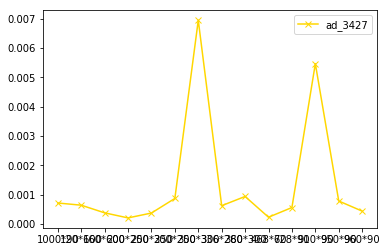

In [23]:
ss_count_ad_3427 = pd.DataFrame(ad_add_3427.groupby('slot size').size().rename('Impression').reset_index())
ss_click_ad_3427 = ad_add_3427.groupby("slot size").agg({"click":"sum"})
ss_new_ad_3427 = ss_count_ad_3427.join(ss_click_ad_3427, on="slot size")
CTR_ad_3427 = pd.DataFrame(ss_new_ad_3427.click/ss_new_ad_3427.Impression)
CTR_ad_3427.columns=["CTR"]

CTR_ad_3427 = ss_new_ad_3427.join(CTR_ad_3427)

ori_3427 = CTR_ad_3427["slot size"]
x_3427 = range(len(ori_3427))
y_3427 = CTR_ad_3427["CTR"]

plt.plot(x_3427, y_3427,label = "ad_3427",color = "gold",marker = "x")
plt.xticks(x_3427, ori_3427)

plt.legend()
plt.show()

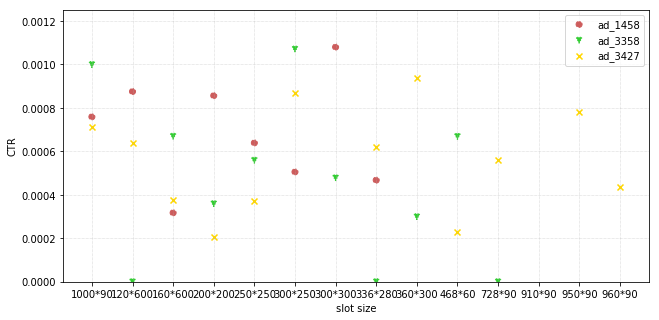

In [30]:
plt.figure(figsize= (10.5,5))
plt.scatter(x_1458, y_1458,label = "ad_1458",color="indianred",linestyle = '-.',marker = 'o')
plt.scatter(x_3358, y_3358,label = "ad_3358",color = "limegreen",linestyle = ':', marker = "v")
plt.scatter(x_3427, y_3427,label = "ad_3427",color = "gold",marker = "x")

plt.xlabel("slot size")
plt.ylabel("CTR")
plt.grid(True, linestyle = ':', linewidth = "0.5") 

plt.xticks(x_3427,ori_3427)
plt.ylim(0,0.00125)

plt.legend()
plt.show()

useragent

In [20]:
#别运
train_useragent = pd.DataFrame(train.groupby('useragent').size().rename('Impression').reset_index())
#train_useragent

In [72]:
#别运
usertag_count_ad_1458 = pd.DataFrame(ad_1458.groupby('usertag').size().rename('Impression').reset_index())
usertag_click_ad_1458 = ad_1458.groupby("usertag").agg({"click":"sum"})
usertag_new_ad_1458 = usertag_count_ad_1458.join(usertag_click_ad_1458, on="usertag")
CTR_ad_1458 = pd.DataFrame(usertag_new_ad_1458.click/usertag_new_ad_1458.Impression)
CTR_ad_1458.columns=["CTR"]

CTR_ad_1458 = usertag_new_ad_1458.join(CTR_ad_1458)

ori = CTR_ad_1458["usertag"]
x = range(len(ori))
y = CTR_ad_1458["CTR"]


In [128]:
#别运
useragent_1458 = ad_1458.set_index("useragent")
useragent_android_1458 = useragent_1458.loc[["android_chrome","android_firefox","android_ie","android_maxthon",
                                      "android_opera","android_other","android_safari","android_sogou"]]
useragent_ios_1458 = useragent_1458.loc[["ios_other","ios_safari"]]
useragent_linux_1458 = useragent_1458.loc[["linux_chrome","linux_firefox","linux_ie","linux_opera","linux_other","linux_safari"]]
useragent_mac_1458 = useragent_1458.loc[["mac_chrome","mac_firefox","mac_maxthon","mac_opera","mac_other","mac_safari","mac_sogou"]]
useragent_other_1458 = useragent_1458.loc[["other_chrome","other_firefox","other_ie","other_opera","other_other","other_safari"]]
useragent_window_1458 = useragent_1458.loc[["windows_chrome","windows_firefox","windows_ie","windows_maxthon","windows_opera","windows_other"
                                           "windows_safari","windows_sogou","windows_theworld"]]

In [ ]:
#train['OS'],train['browser'] = train['useragent'].str.split('_', 1).str

In [20]:
def os_browser(datasetToClean):
    os_browser_df=pd.DataFrame(datasetToClean.useragent.str.split('_',1).tolist(), columns=['os','browser'])
    combineddf=pd.concat([datasetToClean,os_browser_df],axis=1)
    useragentdropped=combineddf.drop('useragent',axis=1)    
    return useragentdropped

In [21]:
train_os_browser = os_browser(train)

In [22]:
train_os_browser.head()

,click,weekday,hour,bidid,userid,IP,region,city,adexchange,domain,...,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,os,browser
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,125.37.175.*,2,2,2,trqRTvKaXTKfgg24JKTI,...,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null,windows,ie
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,171.36.92.*,238,239,1,20fc675468712705dbf5d3eda94126da,...,Na,0,10722,294,23,null,2821,null,windows,chrome
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,59.46.106.*,40,41,2,trqRTJn7O95I1mKYUV,...,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110",windows,ie
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,114.250.226.*,1,1,1,5F97t5E0BTK7XhNrUMpENpn,...,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111",windows,ie
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,183.63.192.*,216,233,2,13625cb070ffb306b425cd803c4b7ab4,...,Na,133,7330,277,133,null,2259,null,windows,ie


In [24]:
len(train_os_browser.groupby("browser"))

9

In [25]:
ad_train_os_browser=train_os_browser.set_index("advertiser")
ad_1458_train_os_browser = ad_train_os_browser.loc[1458]
ad_2259_train_os_browser = ad_train_os_browser.loc[2259]
ad_2261_train_os_browser = ad_train_os_browser.loc[2261]
ad_2821_train_os_browser = ad_train_os_browser.loc[2821]
ad_2997_train_os_browser = ad_train_os_browser.loc[2997]
ad_3358_train_os_browser = ad_train_os_browser.loc[3358]
ad_3386_train_os_browser = ad_train_os_browser.loc[3386]
ad_3427_train_os_browser = ad_train_os_browser.loc[3427]
ad_3476_train_os_browser = ad_train_os_browser.loc[3476]

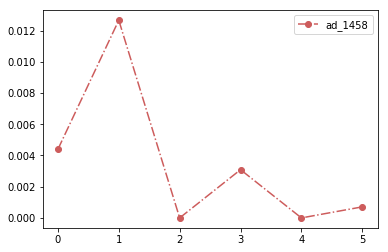

In [56]:
os_count_ad_1458 = pd.DataFrame(ad_1458_train_os_browser.groupby('os').size().rename('Impression').reset_index())
os_click_ad_1458 = ad_1458_train_os_browser.groupby("os").agg({"click":"sum"})
os_new_ad_1458 = os_count_ad_1458.join(os_click_ad_1458, on="os")
CTR_ad_1458 = pd.DataFrame(os_new_ad_1458.click/os_new_ad_1458.Impression)
CTR_ad_1458.columns=["CTR"]

CTR_ad_1458 = os_new_ad_1458.join(CTR_ad_1458)

ori_1458 = CTR_ad_1458["os"]
x_1458 = range(len(ori_1458))
y_1458 = CTR_ad_1458["CTR"]

plt.plot(x_1458, y_1458,label = "ad_1458",color="indianred",linestyle = '-.',marker = 'o')
#plt.xticks(x, ori_1458)


plt.legend()
plt.show()

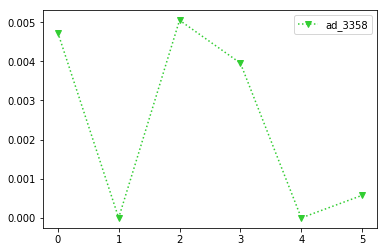

In [57]:
os_count_ad_3358 = pd.DataFrame(ad_3358_train_os_browser.groupby('os').size().rename('Impression').reset_index())
os_click_ad_3358 = ad_3358_train_os_browser.groupby("os").agg({"click":"sum"})
os_new_ad_3358 = os_count_ad_3358.join(os_click_ad_3358, on="os")
CTR_ad_3358 = pd.DataFrame(os_new_ad_3358.click/os_new_ad_3358.Impression)
CTR_ad_3358.columns=["CTR"]

CTR_ad_3358 = os_new_ad_3358.join(CTR_ad_3358)

ori_3358 = CTR_ad_3358["os"]
x_3358 = range(len(ori_3358))
y_3358 = CTR_ad_3358["CTR"]

plt.plot(x_3358, y_3358,label = "ad_3358",color = "limegreen",linestyle = ':', marker = "v")
#plt.xticks(x, ori_3358)


plt.legend()
plt.show()

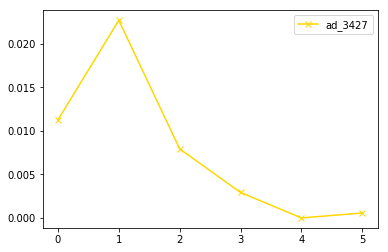

In [58]:
os_count_ad_3427 = pd.DataFrame(ad_3427_train_os_browser.groupby('os').size().rename('Impression').reset_index())
os_click_ad_3427 = ad_3427_train_os_browser.groupby("os").agg({"click":"sum"})
os_new_ad_3427 = os_count_ad_3427.join(os_click_ad_3427, on="os")
CTR_ad_3427 = pd.DataFrame(os_new_ad_3427.click/os_new_ad_3427.Impression)
CTR_ad_3427.columns=["CTR"]

CTR_ad_3427 = os_new_ad_3427.join(CTR_ad_3427)

ori_3427 = CTR_ad_3427["os"]
x_3427 = range(len(ori_3427))
y_3427 = CTR_ad_3427["CTR"]

plt.plot(x_3427, y_3427,label = "ad_3427",color = "gold",marker = "x")
#plt.xticks(x, ori_3427)


plt.legend()
plt.show()

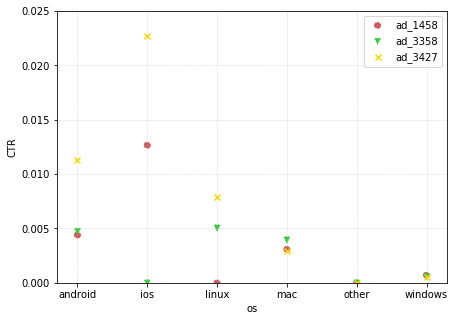

In [59]:
plt.figure(figsize= (7,5))
plt.scatter(x_1458, y_1458,label = "ad_1458",color="indianred",linestyle = '-.',marker = 'o')
plt.scatter(x_3358, y_3358,label = "ad_3358",color = "limegreen",linestyle = ':', marker = "v")
plt.scatter(x_3427, y_3427,label = "ad_3427",color = "gold",marker = "x")

plt.xlabel("os")
plt.ylabel("CTR")
plt.grid(True, linestyle = ':', linewidth = "0.5") 

plt.xticks(x_3427,ori_3427)
plt.ylim(0,0.025)

plt.legend()
plt.show()

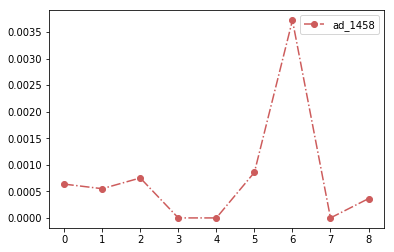

In [49]:
browser_count_ad_1458 = pd.DataFrame(ad_1458_train_os_browser.groupby('browser').size().rename('Impression').reset_index())
browser_click_ad_1458 = ad_1458_train_os_browser.groupby("browser").agg({"click":"sum"})
browser_new_ad_1458 = browser_count_ad_1458.join(browser_click_ad_1458, on="browser")
CTR_ad_1458 = pd.DataFrame(browser_new_ad_1458.click/browser_new_ad_1458.Impression)
CTR_ad_1458.columns=["CTR"]

CTR_ad_1458 = browser_new_ad_1458.join(CTR_ad_1458)

ori_1458 = CTR_ad_1458["browser"]
x_1458 = range(len(ori_1458))
y_1458 = CTR_ad_1458["CTR"]

plt.plot(x_1458, y_1458,label = "ad_1458",color="indianred",linestyle = '-.',marker = 'o')
#plt.xticks(x, ori_1458)


plt.legend()
plt.show()

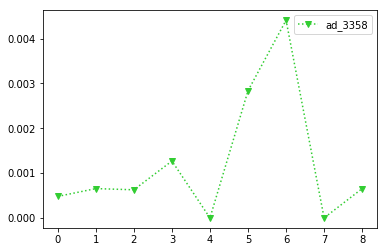

In [50]:
browser_count_ad_3358 = pd.DataFrame(ad_3358_train_os_browser.groupby('browser').size().rename('Impression').reset_index())
browser_click_ad_3358 = ad_3358_train_os_browser.groupby("browser").agg({"click":"sum"})
browser_new_ad_3358 = browser_count_ad_3358.join(browser_click_ad_3358, on="browser")
CTR_ad_3358 = pd.DataFrame(browser_new_ad_3358.click/browser_new_ad_3358.Impression)
CTR_ad_3358.columns=["CTR"]

CTR_ad_3358 = browser_new_ad_3358.join(CTR_ad_3358)

ori_3358 = CTR_ad_3358["browser"]
x_3358 = range(len(ori_3358))
y_3358 = CTR_ad_3358["CTR"]

plt.plot(x_3358, y_3358,label = "ad_3358",color = "limegreen",linestyle = ':', marker = "v")
#plt.xticks(x, ori_1458)


plt.legend()
plt.show()

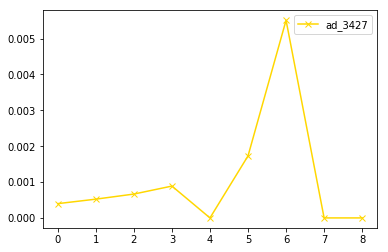

In [51]:
browser_count_ad_3427 = pd.DataFrame(ad_3427_train_os_browser.groupby('browser').size().rename('Impression').reset_index())
browser_click_ad_3427 = ad_3427_train_os_browser.groupby("browser").agg({"click":"sum"})
browser_new_ad_3427 = browser_count_ad_3427.join(browser_click_ad_3427, on="browser")
CTR_ad_3427 = pd.DataFrame(browser_new_ad_3427.click/browser_new_ad_3427.Impression)
CTR_ad_3427.columns=["CTR"]

CTR_ad_3427 = browser_new_ad_3427.join(CTR_ad_3427)

ori_3427 = CTR_ad_3427["browser"]
x_3427 = range(len(ori_3427))
y_3427 = CTR_ad_3427["CTR"]

plt.plot(x_3427, y_3427,label = "ad_3427",color = "gold",marker = "x")
#plt.xticks(x, ori_3427)


plt.legend()
plt.show()

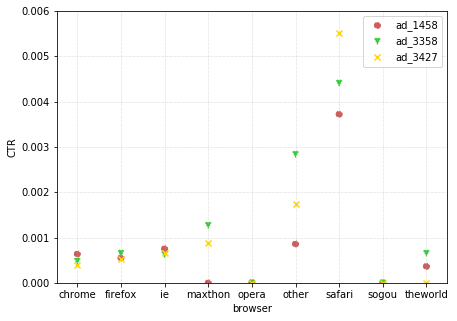

In [55]:
plt.figure(figsize= (7,5))
plt.scatter(x_1458, y_1458,label = "ad_1458",color="indianred",linestyle = '-.',marker = 'o')
plt.scatter(x_3358, y_3358,label = "ad_3358",color = "limegreen",linestyle = ':', marker = "v")
plt.scatter(x_3427, y_3427,label = "ad_3427",color = "gold",marker = "x")

plt.xlabel("browser")
plt.ylabel("CTR")
plt.grid(True, linestyle = ':', linewidth = "0.5") 

plt.xticks(x_3427,ori_3427)
plt.ylim(0,0.006)

plt.legend()
plt.show()

# Market price distribution

In [6]:
train = pd.read_csv("train.csv")

In [7]:
ad = train.set_index("advertiser")

In [8]:
#divide the whole data by different 9 advertiser
ad_1458 = ad.loc[1458]
ad_2259 = ad.loc[2259]
ad_2261 = ad.loc[2261]
ad_2821 = ad.loc[2821]
ad_2997 = ad.loc[2997]
ad_3358 = ad.loc[3358]
ad_3386 = ad.loc[3386]
ad_3427 = ad.loc[3427]
ad_3476 = ad.loc[3476]

weekday

In [9]:
payprice_weekday_1458 = ad_1458.groupby("weekday").agg({"payprice":"mean"})
payprice_weekday_1458

,payprice
weekday,
0,63.319567
1,74.285561
2,72.310495
3,69.840215
4,69.194245
5,67.872030
6,67.099226


In [10]:
payprice_weekday_3358 = ad_3358.groupby("weekday").agg({"payprice":"mean"})
payprice_weekday_3358

,payprice
weekday,
0,82.694414
1,84.331138
2,88.601932
3,80.652537
4,87.681772
5,88.858917
6,83.211502


In [11]:
payprice_weekday_3427 = ad_3427.groupby("weekday").agg({"payprice":"mean"})
payprice_weekday_3427

,payprice
weekday,
0,68.844290
1,78.284744
2,77.504929
3,77.281661
4,77.691550
5,77.412882
6,71.584630


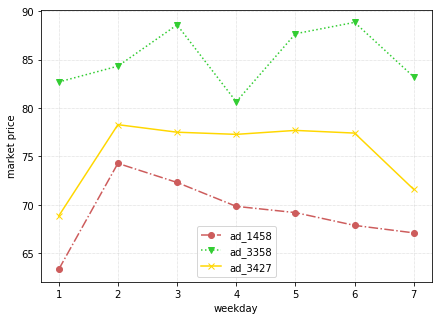

In [12]:
plt.figure(figsize=(7,5))
x=[1,2,3,4,5,6,7]
plt.plot(x, payprice_weekday_1458["payprice"],label = "ad_1458", color="indianred",linestyle = '-.',marker = 'o')
plt.plot(x, payprice_weekday_3358["payprice"],label = "ad_3358", color = "limegreen",linestyle = ':', marker = "v")
plt.plot(x, payprice_weekday_3427["payprice"],label = "ad_3427", color = "gold",marker = "x")

plt.xlabel("weekday")
plt.ylabel("market price")
plt.grid(True, linestyle = ':', linewidth = "0.5")

plt.legend()
plt.show()

hour

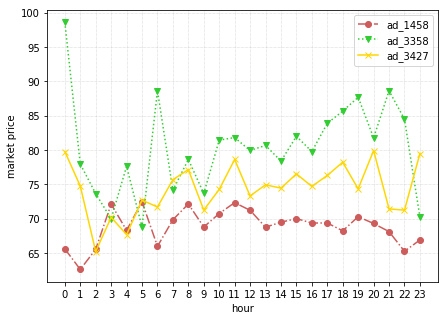

In [13]:
plt.figure(figsize=(7,5))
payprice_hour_1458 = ad_1458.groupby("hour").agg({"payprice":"mean"})
payprice_hour_3358 = ad_3358.groupby("hour").agg({"payprice":"mean"})
payprice_hour_3427 = ad_3427.groupby("hour").agg({"payprice":"mean"})

x=range(0,24)
plt.plot(x, payprice_hour_1458["payprice"],label = "ad_1458", color="indianred",linestyle = '-.',marker = 'o')
plt.plot(x, payprice_hour_3358["payprice"],label = "ad_3358", color = "limegreen",linestyle = ':', marker = "v")
plt.plot(x, payprice_hour_3427["payprice"],label = "ad_3427", color = "gold",marker = "x")

plt.xlabel("hour")
plt.ylabel("market price")
plt.grid(True, linestyle = ':', linewidth = "0.5") 

plt.xticks(np.linspace(0, 23, 24))
plt.legend()
plt.show()

region

In [14]:
value = train.region.unique()
sort =sorted(value)
sort =np.asarray(sort)
sort

array([  0,   1,   2,   3,  15,  27,  40,  55,  65,  79,  80,  94, 106,
       124, 134, 146, 164, 183, 201, 216, 238, 253, 275, 276, 298, 308,
       325, 333, 344, 359, 368, 374, 393, 394, 395], dtype=int64)

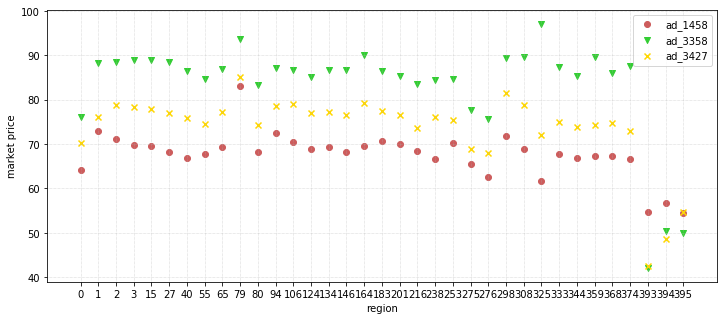

In [15]:
payprice_region_1458 = ad_1458.groupby("region").agg({"payprice":"mean"})
payprice_region_3358 = ad_3358.groupby("region").agg({"payprice":"mean"})
payprice_region_3427 = ad_3427.groupby("region").agg({"payprice":"mean"})

plt.figure(figsize=(12,5))
x=range(0, len(train.groupby("region")))
odinate=[  0,   1,   2,   3,  15,  27,  40,  55,  65,  79,  80,  94, 106,
       124, 134, 146, 164, 183, 201, 216, 238, 253, 275, 276, 298, 308,
       325, 333, 344, 359, 368, 374, 393, 394, 395]

plt.scatter(x, payprice_region_1458["payprice"],label = "ad_1458", color="indianred",marker = 'o')
plt.scatter(x, payprice_region_3358["payprice"],label = "ad_3358", color = "limegreen", marker = "v")
plt.scatter(x, payprice_region_3427["payprice"],label = "ad_3427", color = "gold",marker = "x")

plt.xlabel("region")
plt.ylabel("market price")
plt.grid(True, linestyle = ':', linewidth = "0.5") 

plt.xticks(x, odinate)

plt.legend()
plt.show()

city

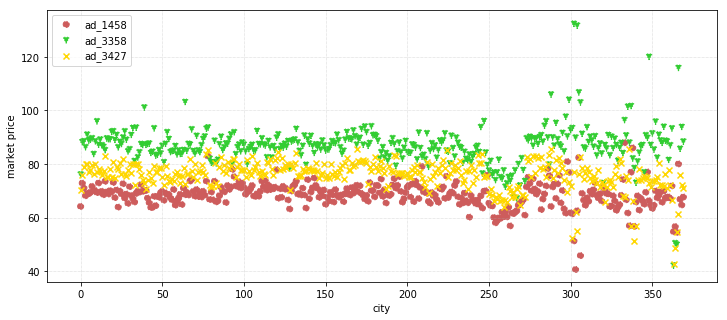

In [16]:
payprice_city_1458 = ad_1458.groupby("city").agg({"payprice":"mean"})
payprice_city_3358 = ad_3358.groupby("city").agg({"payprice":"mean"})
payprice_city_3427 = ad_3427.groupby("city").agg({"payprice":"mean"})

plt.figure(figsize=(12,5))
x=range(0, len(train.groupby("city")))

plt.scatter(x, payprice_city_1458["payprice"],label = "ad_1458", color="indianred",linestyle = '-.',marker = 'o')
plt.scatter(x, payprice_city_3358["payprice"],label = "ad_3358", color = "limegreen",linestyle = ':', marker = "v")
plt.scatter(x, payprice_city_3427["payprice"],label = "ad_3427", color = "gold",marker = "x")

plt.xlabel("city")
plt.ylabel("market price")
plt.grid(True, linestyle = ':', linewidth = "0.5") 


plt.legend()
plt.show()

ad exchange

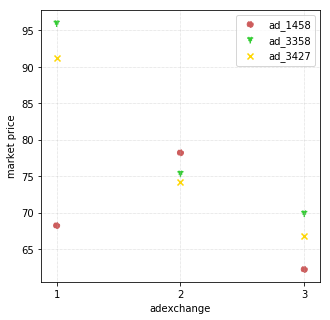

In [17]:
plt.figure(figsize=(5,5))
payprice_adexchange_1458 = ad_1458.groupby("adexchange").agg({"payprice":"mean"})
payprice_adexchange_3358 = ad_3358.groupby("adexchange").agg({"payprice":"mean"})
payprice_adexchange_3427 = ad_3427.groupby("adexchange").agg({"payprice":"mean"})

x = [1,2,3]
plt.scatter(x, payprice_adexchange_1458["payprice"],label = "ad_1458", color="indianred",linestyle = '-.',marker = 'o')
plt.scatter(x, payprice_adexchange_3358["payprice"],label = "ad_3358", color = "limegreen",linestyle = ':', marker = "v")
plt.scatter(x, payprice_adexchange_3427["payprice"],label = "ad_3427", color = "gold",marker = "x")

plt.xlabel("adexchange")
plt.ylabel("market price")
plt.grid(True, linestyle = ':', linewidth = "0.5") 

plt.xticks(np.linspace(1, 3, 3))
plt.legend()
plt.show()

slot size

In [18]:
e=[]

for index, row in train.iterrows():
    e.append(str(row["slotwidth"])+str("*")+str(row["slotheight"]))
    
train.insert(15, 'slot size', e)

In [19]:
train_new = train
train_new.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1,...,250,FourthView,Na,0,10722,294,23,null,2821,null
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2,...,90,OtherView,Na,133,7330,277,133,null,2259,null


In [20]:
ad_add = train_new.set_index("advertiser")
ad_add_1458 = ad_add.loc[1458]
ad_add_2259 = ad_add.loc[2259]
ad_add_2261 = ad_add.loc[2261]
ad_add_2821 = ad_add.loc[2821]
ad_add_2997 = ad_add.loc[2997]
ad_add_3358 = ad_add.loc[3358]
ad_add_3386 = ad_add.loc[3386]
ad_add_3427 = ad_add.loc[3427]
ad_add_3476 = ad_add.loc[3476]

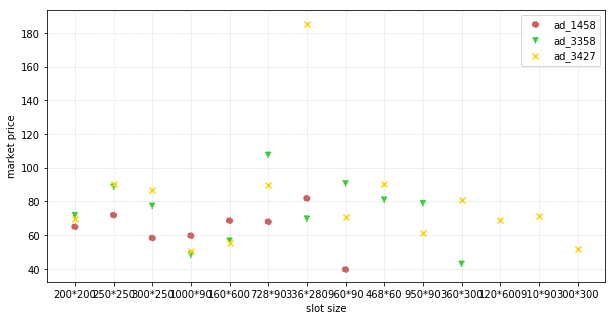

In [21]:
payprice_slotsize_1458 = ad_add_1458.groupby("slot size").agg({"payprice":"mean"})
payprice_slotsize_3358 = ad_add_3358.groupby("slot size").agg({"payprice":"mean"})
payprice_slotsize_3427 = ad_add_3427.groupby("slot size").agg({"payprice":"mean"})

plt.figure(figsize=(10,5))
#x=range(0, len(train.groupby("slot size")))

plt.scatter(range(0,len(ad_add_1458.groupby("slot size"))), payprice_slotsize_1458["payprice"],
            label = "ad_1458", color="indianred",linestyle = '-.',marker = 'o')
plt.scatter(range(0,len(ad_add_3358.groupby("slot size"))), payprice_slotsize_3358["payprice"],
            label = "ad_3358", color = "limegreen",linestyle = ':', marker = "v")
plt.scatter(range(0,len(ad_add_3427.groupby("slot size"))), payprice_slotsize_3427["payprice"],
            label = "ad_3427", color = "gold",marker = "x")

ori=ad_add_3427["slot size"].unique()

plt.xlabel("slot size")
plt.ylabel("market price")
plt.grid(True, linestyle = ':', linewidth = "0.5") 
plt.xticks(range(0,len(ad_add_3427.groupby("slot size"))), ori)

plt.legend()
plt.show()

useragent

In [22]:
def os_browser(datasetToClean):
    os_browser_df=pd.DataFrame(datasetToClean.useragent.str.split('_',1).tolist(), columns=['os','browser'])
    combineddf=pd.concat([datasetToClean,os_browser_df],axis=1)
    useragentdropped=combineddf.drop('useragent',axis=1)    
    return useragentdropped

In [23]:
train_os_browser = os_browser(train)

In [24]:
train_os_browser.head()

,click,weekday,hour,bidid,userid,IP,region,city,adexchange,domain,...,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,os,browser
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,125.37.175.*,2,2,2,trqRTvKaXTKfgg24JKTI,...,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null,windows,ie
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,171.36.92.*,238,239,1,20fc675468712705dbf5d3eda94126da,...,Na,0,10722,294,23,null,2821,null,windows,chrome
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,59.46.106.*,40,41,2,trqRTJn7O95I1mKYUV,...,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110",windows,ie
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,114.250.226.*,1,1,1,5F97t5E0BTK7XhNrUMpENpn,...,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111",windows,ie
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,183.63.192.*,216,233,2,13625cb070ffb306b425cd803c4b7ab4,...,Na,133,7330,277,133,null,2259,null,windows,ie


In [25]:
ad_train_os_browser=train_os_browser.set_index("advertiser")
ad_1458_train_os_browser = ad_train_os_browser.loc[1458]
ad_2259_train_os_browser = ad_train_os_browser.loc[2259]
ad_2261_train_os_browser = ad_train_os_browser.loc[2261]
ad_2821_train_os_browser = ad_train_os_browser.loc[2821]
ad_2997_train_os_browser = ad_train_os_browser.loc[2997]
ad_3358_train_os_browser = ad_train_os_browser.loc[3358]
ad_3386_train_os_browser = ad_train_os_browser.loc[3386]
ad_3427_train_os_browser = ad_train_os_browser.loc[3427]
ad_3476_train_os_browser = ad_train_os_browser.loc[3476]

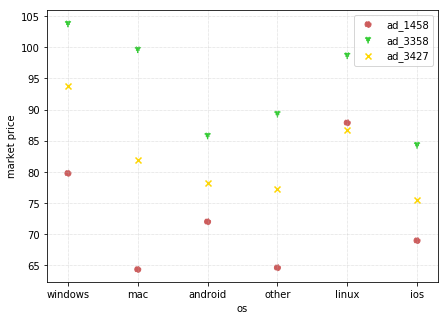

In [26]:
payprice_os_1458 = ad_1458_train_os_browser.groupby("os").agg({"payprice":"mean"})
payprice_os_3358 = ad_3358_train_os_browser.groupby("os").agg({"payprice":"mean"})
payprice_os_3427 = ad_3427_train_os_browser.groupby("os").agg({"payprice":"mean"})

plt.figure(figsize=(7,5))
#x=range(0, len(train.groupby("slot size")))

plt.scatter(range(0,len(ad_1458_train_os_browser.groupby("os"))), payprice_os_1458["payprice"],
            label = "ad_1458", color="indianred",linestyle = '-.',marker = 'o')
plt.scatter(range(0,len(ad_3358_train_os_browser.groupby("os"))), payprice_os_3358["payprice"],
            label = "ad_3358", color = "limegreen",linestyle = ':', marker = "v")
plt.scatter(range(0,len(ad_3427_train_os_browser.groupby("os"))), payprice_os_3427["payprice"],
            label = "ad_3427", color = "gold",marker = "x")

ori=ad_3427_train_os_browser["os"].unique()

plt.xlabel("os")
plt.ylabel("market price")
plt.grid(True, linestyle = ':', linewidth = "0.5") 
plt.xticks(range(0,len(ad_3427_train_os_browser.groupby("os"))), ori)

plt.legend()
plt.show()

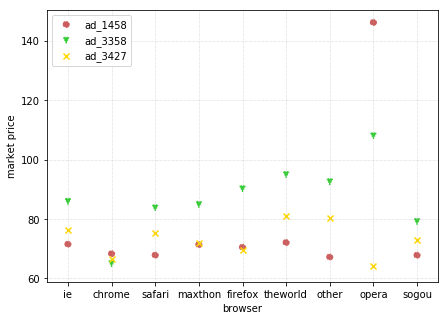

In [27]:
payprice_browser_1458 = ad_1458_train_os_browser.groupby("browser").agg({"payprice":"mean"})
payprice_browser_3358 = ad_3358_train_os_browser.groupby("browser").agg({"payprice":"mean"})
payprice_browser_3427 = ad_3427_train_os_browser.groupby("browser").agg({"payprice":"mean"})

plt.figure(figsize=(7,5))
#x=range(0, len(train.groupby("slot size")))

plt.scatter(range(0,len(ad_1458_train_os_browser.groupby("browser"))), payprice_browser_1458["payprice"],
            label = "ad_1458", color="indianred",linestyle = '-.',marker = 'o')
plt.scatter(range(0,len(ad_3358_train_os_browser.groupby("browser"))), payprice_browser_3358["payprice"],
            label = "ad_3358", color = "limegreen",linestyle = ':', marker = "v")
plt.scatter(range(0,len(ad_3427_train_os_browser.groupby("browser"))), payprice_browser_3427["payprice"],
            label = "ad_3427", color = "gold",marker = "x")

ori=ad_3427_train_os_browser["browser"].unique()

plt.xlabel("browser")
plt.ylabel("market price")
plt.grid(True, linestyle = ':', linewidth = "0.5") 
plt.xticks(range(0,len(ad_3427_train_os_browser.groupby("browser"))), ori)

plt.legend()
plt.show()